# Getting started

In this tutorial we are going to show some cases of using the GBasis library

In [ ]:
# install GBasis module
!pip install git+https://github.com/theochem/gbasis

In [1]:
import gbasis
import pyscf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gbasis.wrappers import from_pyscf
from gbasis.evals import density

In [5]:

# define molecule
mol = pyscf.gto.Mole()
mol.atom = '''
O 0.000000000000  0.000000000000  0.000000000000
H 0.000000000000 -0.757160000000  0.586260000000
H 0.000000000000  0.757160000000  0.586260000000'''
mol.basis = 'STO-3G'

# define calculation
mol.build()
mf = pyscf.scf.RHF(mol)
mf.kernel()
rdm1 = mf.make_rdm1()

# get basis set
basis = from_pyscf(mol)

converged SCF energy = -74.9629916147472


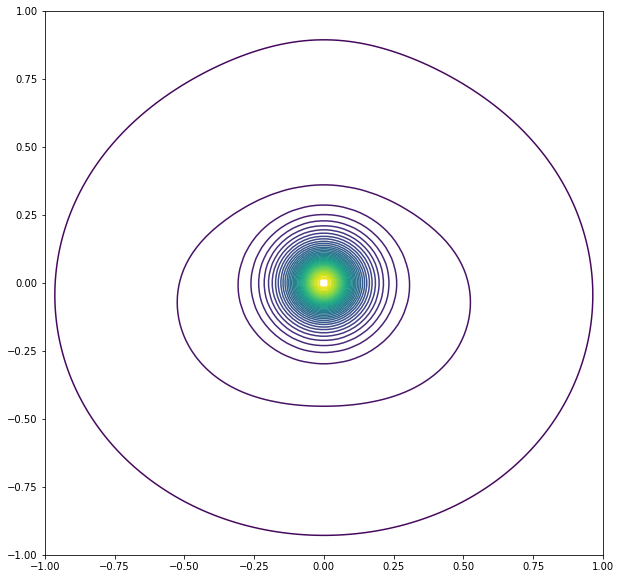

In [6]:
# create grid
x = np.linspace(-1, 1, 100)
xx, yy, zz = np.meshgrid(x, x, x)
points = np.array([xx, yy, zz]).T.reshape(-1, 3)

# calculate density matrix
dens = density.evaluate_density(rdm1, basis, points)
dens = dens.reshape((100, 100, 100))

# plot 3d density
plt.figure(figsize=(10, 10))
plt.contour(x, x, dens.sum(axis=2), 50)
plt.show()